# [Linear regression][1]

A linear model makes a prediction by simply computing <u><b> a weighted sum of the input features </b></u>, plus a constant called <u><b> the bias term (also called the intercept term) </b></u>: --- Examples [1][2] and [2][3]

1. Simple Linear equation: $\hat{y}=mx+c$ where $x$ is the independent variable, $m$ is the weight or the slope, $c$ is the bias term or the intercept, and $\hat{y}$ is the prediction or dependent variable.


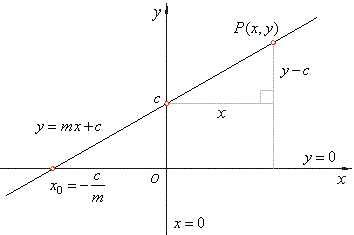 


We have data of and the independent vs. dependent variables:

<img style="float: center" src="./images/Y_X_Regression.png" alt="drawing" height="300" width="400"/>

We need to model the data with a linear equation:

<img style="float: center" src="./images/Y_X_Regression_Prediction.png" alt="drawing" height="300" width="400"/>




2. multi-variable equation: $\hat{y}=\theta_0 +\theta_1x_1+\theta_2x_2+....+\theta_nx_n$ where $n$ is the number of parameters. 


The cost or loss function to minimize: $MSE(X,h_\theta)=\frac{1}{m}\sum_{i=1}^m(\theta^T.x^{(i)}-y^{(i)})^2$ where $m$ is the data points to predict


 




[1]:https://www.youtube.com/watch?v=E5RjzSK0fvY
[2]:https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931
[3]:https://ml-cheatsheet.readthedocs.io/en/latest/linear_regression.html


# [Gradient Descent][1]

<b>Gradient descent:</b> is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. TThe general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

## In the linear regression:

We have to tweak $\theta$ parameters with the following gradient descent:

<img style="float: center" src="./images/GD-1.png" alt="drawing" height="300" width="400"/>

<u> Learning rate too small</u>:

<img style="float: center" src="./images/GD-2.jpg" alt="drawing" height="300" width="400"/>

<u> Learning rate too large</u>:

<img style="float: center" src="./images/GD-3.jpg" alt="drawing" height="300" width="400"/>

if the random initialization starts the algorithm on the left, then it will converge to <u>a local minimum</u>, which is not as good as the global minimum. If it starts on the right, then it will take a very long time to cross <u>the plateau</u>, and if you stop too early you will never reach the global minimum.

<img style="float: center" src="./images/GD-4.jpg" alt="drawing" height="300" width="400"/>

We need <u>feature scaling with gradient descent</u> to goes straight forward towards the minimum:

<img style="float: center" src="./images/FS-GD.jpg" alt="drawing" height="300" width="400"/>

### Partial Derivatives of the cost function

<center> $\frac{\partial}{\partial\theta_j} MSE(\theta)=\frac{2}{m}\sum_{i=1}^m(\theta^T.x^{i}-y^{(i)})x_j^{(i)} $ </center>


### Gradient vector of the cost function

<center>
$\nabla_{\theta_j}MSE(\theta)=\begin{pmatrix} 
      \frac{\partial}{\partial\theta_0} MSE(\theta)\\
      \frac{\partial}{\partial\theta_0} MSE(\theta) \\
      \cdots\\
      \cdots\\
      \frac{\partial}{\partial\theta_n} MSE(\theta) 
   \end{pmatrix} 
   =\frac{2}{m}X^T(X.\theta-y)
$
</center>

### Gradient descent step

<center> $\theta^{(next step)}=\theta-\eta\nabla_{\theta}MSE(\theta)$ </center> 

where $\nabla$ is the learning rate. We repeat this step till loss function becomes <b>zero</b>.


[1]:https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html

### [Let us practice][1] -- Linear regression with gradient descent

Assume that you have $\hat{y}=mx+c$ and you have the error function $E=\frac{1}{n}\sum_{i=1}^n(y_i-(mx_i+c))^2$ where $n$ is the number of data points:

1. Partial derivative with respect to m is $D_m=\frac{-2}{n}\sum_{i=0}^nx_i(y_i-\hat{y_i})$.

2. Partial derivative with respect to c is $D_c=\frac{-2}{n}\sum_{i=0}^n(y_i-\hat{y_i})$.

3. Update the next steps; where $L$ is the learning rate:
    - $m=m-LD_m$
    - $c=c-LD_c$

[1]:https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931

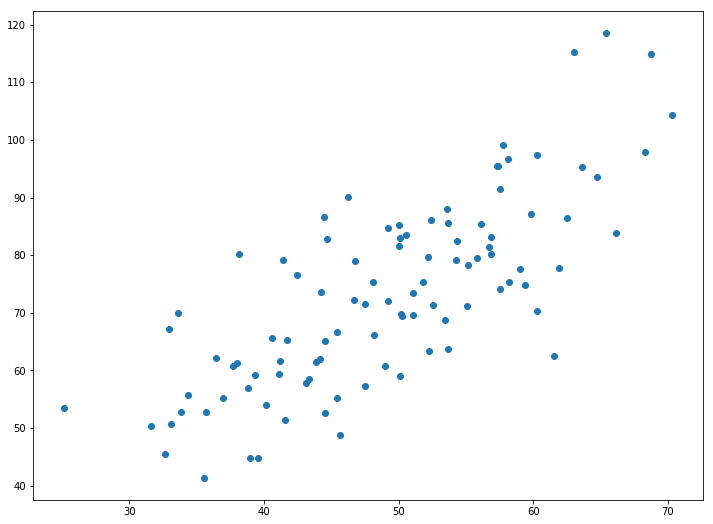

In [2]:
# Making the imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 9.0)

# Preprocessing Input data
data = pd.read_csv('~/DATA/data.csv')
X = data.iloc[:, 0]
Y = data.iloc[:, 1]
plt.scatter(X, Y)
plt.show()

In [7]:
# Building the model
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

1.4796491688889395 0.10148121494753726


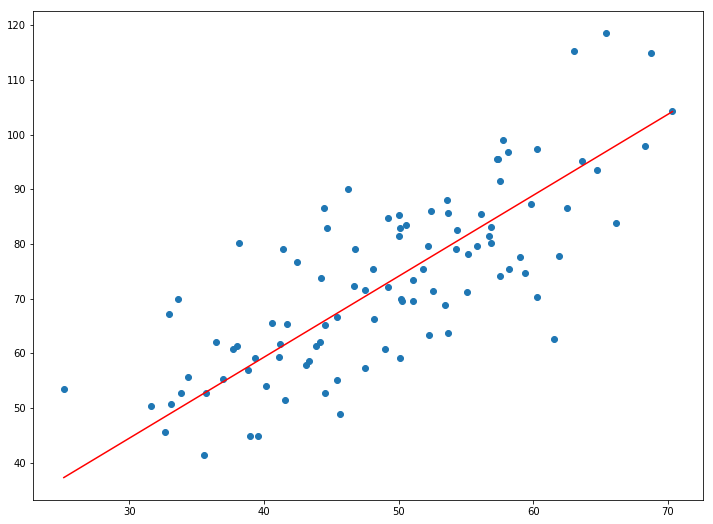

In [8]:
# Making predictions
Y_pred = m*X + c

plt.scatter(X, Y) 
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()

# Gradient descent types

1. Batch GD
2. Stochastic GD
3. Mini-Batch GD


# [Least squares method][1]

A line of best fit is a straight line that is the best approximation of the given set of data. Given $\hat{y}=mx+c$

## Quadratic loss function

<center> $\large L(x)=\sum_{i=1}^n(y_i-p_i)^2$</center>

After derivative of $L$, $m$ and $c$:

<center> $\large m=\frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n(x_i-\bar{x})^2}$</center>
<br/>
<br/>
<center> $\large c=\bar{y}-m\bar{x}$ </center>


[1]:https://towardsdatascience.com/linear-regression-using-least-squares-a4c3456e8570

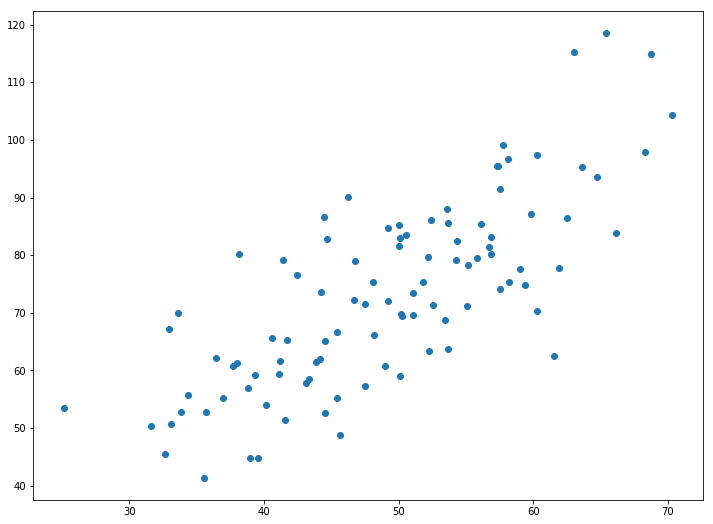

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 9.0)

# Preprocessing Input data
data = pd.read_csv('~/DATA/data.csv')
X = data.iloc[:, 0]
Y = data.iloc[:, 1]
plt.scatter(X, Y)
plt.show()

In [24]:
# Building the model
X_mean = np.mean(X)
Y_mean = np.mean(Y)

num = 0
den = 0
for i in range(len(X)):
    num += (X[i] - X_mean)*(Y[i] - Y_mean)
    den += (X[i] - X_mean)**2
m = num / den
c = Y_mean - m*X_mean

print (m, c)

1.2873573700109313 9.908606190326537


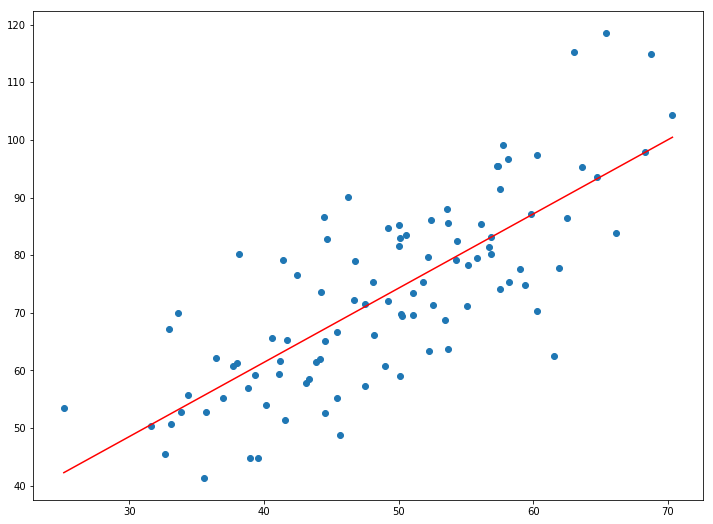

In [25]:
# Making predictions
Y_pred = m*X + c

plt.scatter(X, Y) # actual
# plt.scatter(X, Y_pred, color='red')
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.show()